# <-- Task 18 -->
## Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("penguins_size.csv")

In [3]:
df. head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
null_data = df[df.isnull().any(axis=1)]
null_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
nan_rows = df[df.isnull().sum(axis=1) > 2]
nan_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
(10/344)*100

2.9069767441860463

In [10]:
df = df.dropna()

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df.at[336,'sex'] = 'FEMALE'

In [14]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

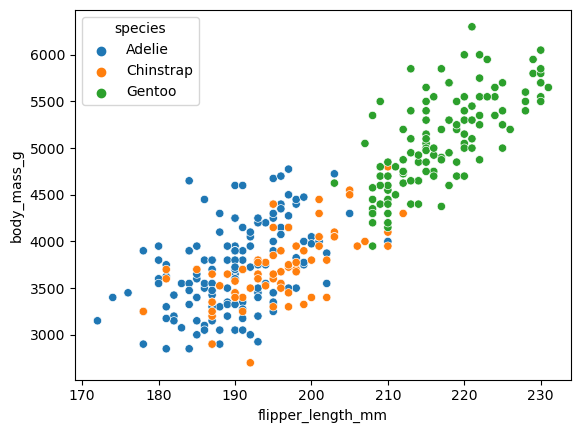

In [15]:
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df,hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

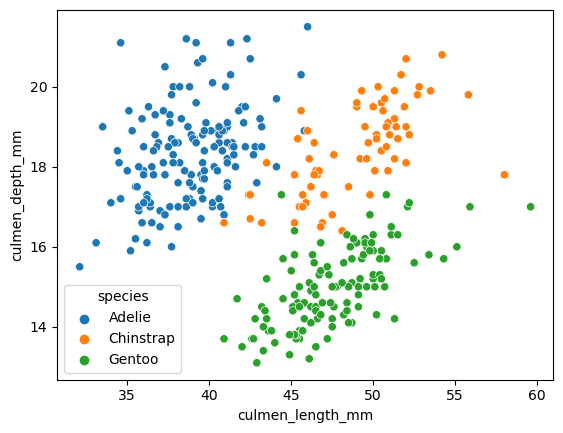

In [16]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')

In [17]:
fea_df = pd.get_dummies(df.drop('species',axis = 1),drop_first=True)
fea_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


###### Train Test split

In [18]:
X = fea_df

In [19]:
y = df['species']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(fea_df, y, test_size=0.3, random_state=1)

###### Model training

In [43]:
from sklearn.naive_bayes import MultinomialNB


In [44]:
gnb = MultinomialNB()

In [45]:
gnb.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_pred = gnb.predict(X_test)

###### Evaluation

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[35,  5,  3],
       [ 3, 21,  0],
       [ 1,  0, 33]], dtype=int64)

C:\Users\dania\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


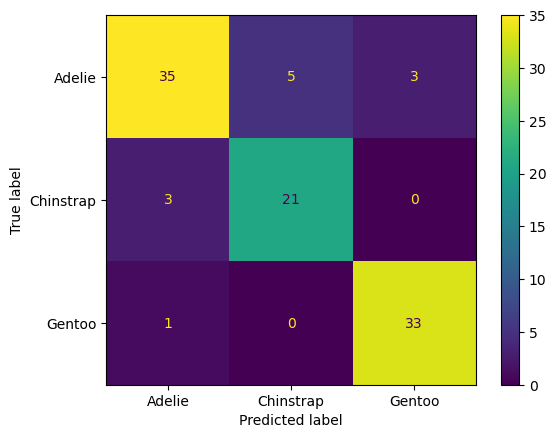

In [49]:
plot_confusion_matrix(gnb,X_test,y_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.90      0.81      0.85        43
   Chinstrap       0.81      0.88      0.84        24
      Gentoo       0.92      0.97      0.94        34

    accuracy                           0.88       101
   macro avg       0.87      0.89      0.88       101
weighted avg       0.88      0.88      0.88       101



In [51]:
# we got 94% accu with DTC and  88%  with Naive bayes